# Анализ данных: Подержанные автомобили в Великобритании



Датасет: used_cars_UK.csv

В рамках анализа рассматриваются данные о подержанных автомобилях, выставленных на продажу в Великобритании. Данные включают различные характеристики автомобилей: марку, модель, год выпуска, тип топлива, пробег, трансмиссию, объём двигателя, экологический класс и др.

## Бизнес-задача



Провести анализ вторичного автомобильного рынка Великобритании и выявить ключевые факторы, влияющие на цену подержанных автомобилей.

## Цель

Определить, какие технические и эксплуатационные характеристики автомобилей (год выпуска, пробег, тип топлива, марка, трансмиссия и др.) оказывают наибольшее влияние на цену. Результаты анализа позволят:
*   продавцам — обоснованно формировать цену и выделять конкурентные преимущества автомобиля в объявлении.
*   покупателям — принимать более взвешенные решения при выборе автомобиля с оптимальным соотношением "цена–качество".
*   платформам объявлений — внедрять алгоритмы ценообразования и рекомендаций.




In [3]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Загружаем CSV-файл
df = pd.read_csv("used_cars_UK.csv")

In [5]:
# Смотрим первые строки таблицы
df.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


### Вывод

Данные успешно загружены. Датасет used_cars_UK содержит информацию об автомобилях с пробегом, включая цену, пробег, год регистрации, тип топлива, тип кузова, объем двигателя и т.д.

# Предобработка данных

## 1. Первичное знакомство с данными

In [6]:
print("Первые 5 строк:")
df.head()

Первые 5 строк:


,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [7]:
print("Последние 5 строк:")
df.tail()

Последние 5 строк:


,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
3680,4723,Renault Megane,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3681,4724,Audi A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3682,4725,BMW 3 Series,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3683,4726,Honda Accord,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full
3684,4727,Vauxhall Corsa,2000,82160,2013,7.0,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 5,NaN


In [8]:
print("Случайная выборка строк:")
df.sample(5)

Случайная выборка строк:


,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
2543,3265,Jaguar XJ,5490,124414,2008,NaN,Diesel,Saloon,2.7L,Automatic,4.0,5.0,Euro 4,Full
764,825,Ford Focus,8975,86500,2017,NaN,Diesel,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,NaN
2794,3633,Hyundai ix35,6995,90000,2015,NaN,Diesel,SUV,1.7L,Manual,5.0,5.0,Euro 5,NaN
3004,3899,Volkswagen Golf Hatchback,8663,75598,2013,2.0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
605,652,BMW 3 Series,3500,42460,2007,2.0,Diesel,Coupe,2.0L,Automatic,2.0,4.0,Euro 4,NaN


In [9]:
print("Информация о датафрейме:")
print(df.info())

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3685 non-null   int64  
 1   title              3685 non-null   object 
 2   Price              3685 non-null   int64  
 3   Mileage(miles)     3685 non-null   int64  
 4   Registration_Year  3685 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3685 non-null   object 
 7   Body type          3685 non-null   object 
 8   Engine             3640 non-null   object 
 9   Gearbox            3685 non-null   object 
 10  Doors              3660 non-null   float64
 11  Seats              3650 non-null   float64
 12  Emission Class     3598 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 403.2+ KB
None


In [10]:
print("Описание числовых признаков:")
df.describe()

Описание числовых признаков:


,Unnamed: 0,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,2314.770963,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,1415.821308,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,0.000000,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,1059.000000,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,2279.000000,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,3593.000000,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,4727.000000,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


In [11]:
# Количество ненулевых значений
df.notnull().sum()

,0
Unnamed: 0,3685
title,3685
Price,3685
Mileage(miles),3685
Registration_Year,3685
Previous Owners,2276
Fuel type,3685
Body type,3685
Engine,3640
Gearbox,3685


In [12]:
print("Использование памяти:")
df.memory_usage(deep=True)

Использование памяти:


,0
Index,132
Unnamed: 0,29480
title,258112
Price,29480
Mileage(miles),29480
Registration_Year,29480
Previous Owners,29480
Fuel type,232958
Body type,237566
Engine,223480


### Вывод

Названия столбцов Price,	Mileage(miles),	Registration_Year, Previous Owners,	Fuel type,	Body type,	Engine,	Gearbox,	Doors,	Seats,	Emission Class,	Service history содержат пробелы и заглавные буквы.

Числовые столбцы Doors, Seats, Registration_Year с типом float, которые можно привести к int.

## 2. Проверка структуры и выявление проблем

In [13]:
# Проверка количества пропущенных значений
print("Количество пропущенных значений по столбцам:")
df.isnull().sum()

Количество пропущенных значений по столбцам:


,0
Unnamed: 0,0
title,0
Price,0
Mileage(miles),0
Registration_Year,0
Previous Owners,1409
Fuel type,0
Body type,0
Engine,45
Gearbox,0


In [14]:
# Проверка дубликатов
print("Количество дубликатов:")
print(df.duplicated().sum())

Количество дубликатов:
0


### Вывод

Столбцы Previous Owners, Engine, Seats, Doors, Emission Class, Service history содержат пропуски.

Дубликаты отсутствуют.

## 3. Приведение к змеиному регистру

In [15]:
# Преобразование названий столбцов в snake_case
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('[^a-z0-9_]', '', regex=True)
)

In [16]:
# Приведение строковых значений к нижнему регистру
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.lower().str.strip()

print(df.columns)

Index(['unnamed_0', 'title', 'price', 'mileagemiles', 'registration_year',
       'previous_owners', 'fuel_type', 'body_type', 'engine', 'gearbox',
       'doors', 'seats', 'emission_class', 'service_history'],
      dtype='object')


In [17]:
df.rename(columns={'mileagemiles': 'mileage'}, inplace=True)

### Вывод

Названия столбцов price, mileage, registration_year, previous_owners, fuel_type, body_type, engine, gearbox, doors, seats, emission_class, service_history приведены к змеиному регистру для обеспечения единообразия, читаемости кода и соответствия общепринятым стандартам оформления данных.

## 4. Удаление ненужного столбца

In [18]:
df.drop('unnamed_0', axis=1, inplace=True)

Столбец Unnamed: 0 представляет собой дублирующий индекс и не несёт полезной информации, поэтому был удалён.

## 5. Работа с пропусками

In [19]:
# До обработки
print(df.isnull().sum())

title                   0
price                   0
mileage                 0
registration_year       0
previous_owners      1409
fuel_type               0
body_type               0
engine                 45
gearbox                 0
doors                  25
seats                  35
emission_class         87
service_history      3145
dtype: int64


In [20]:
# Пропуски в previous_owners — числовой тип
df['previous_owners'].fillna(df['previous_owners'].median(), inplace=True)

/tmp/ipython-input-20-1831634881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_owners'].fillna(df['previous_owners'].median(), inplace=True)


In [21]:
df['service_history'].fillna("unknown", inplace=True)

/tmp/ipython-input-21-1763877203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['service_history'].fillna("unknown", inplace=True)


In [22]:
# Удаляем строки с редкими пропусками (<5%)
df.dropna(inplace=True)

In [23]:
# После обработки
print(df.isnull().sum())

title                0
price                0
mileage              0
registration_year    0
previous_owners      0
fuel_type            0
body_type            0
engine               0
gearbox              0
doors                0
seats                0
emission_class       0
service_history      0
dtype: int64


### Обоснование

previous_owners — медиана, так как устойчиво к выбросам

service_history — пропуски - это отсутвие сервисной истории

Остальные столбцы содержали менее 5% пропусков — строки удалены

### Вывод

Все пропущенные значения в столбцах previous_owners, engine, seats, doors, emission_class, service_history были исправленны.

## 5. Преобразование типов данных

In [24]:
# Приводим к целочисленному типу
df['doors'] = df['doors'].astype(int)
df['seats'] = df['seats'].astype(int)
df['previous_owners'] = df['previous_owners'].astype(int)
df['registration_year'] = df['registration_year'].astype(int)

In [25]:
df['engine'] = (
    df['engine']
    .astype(str)                         # Преобразуем всё в строки
    .str.replace(',', '.', regex=False)  # Заменим запятую на точку
    .str.extract(r'(\d+\.?\d*)')[0]      # Извлекаем только числа (целые или с точкой)
    .astype(float)                       # Преобразуем в float (можно заменить на int, если только целые)
)

In [26]:
df['emission_class'] = (
    df['emission_class']
    .astype(str)                         # Преобразуем всё в строки
    .str.extract(r'(\d+\.?\d*)')[0]      # Извлекаем только числа (целые или с точкой)
    .astype(int)                       # Преобразуем в float (можно заменить на int, если только целые)
)

### Вывод

Столбцы doors, seats и registration_year приведены к типу int для корректной обработки числовых значений.

Столбец engine очищен от нечисловых символов (например, '1,6L' → 1.6) и преобразован в float для анализа объёма двигателя.

Столбец emission_class также очищен от лишнего текста и приведён к типу int.

## 6. Промежуточные выводы

In [27]:
df.head()

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
0,skoda fabia,6900,70189,2016,3,diesel,hatchback,1.4,manual,5,5,6,unknown
1,vauxhall corsa,1495,88585,2008,4,petrol,hatchback,1.2,manual,3,5,4,full
2,hyundai i30,949,137000,2011,3,petrol,hatchback,1.4,manual,5,5,5,unknown
3,mini hatch,2395,96731,2010,5,petrol,hatchback,1.4,manual,3,4,4,full
4,vauxhall corsa,1000,85000,2013,3,diesel,hatchback,1.3,manual,5,5,5,unknown



*   Проведена очистка и нормализация данных
*   Исправлены наименования столбцов и формат текста
*   Обработаны пропущенные значения
*   Изменены типы данных для точности и экономии памяти


# Исследовательский анализ данных

## Индексация

### Индексация по координатам

In [28]:
df.iloc[0]                 # Первая строка

,0
title,skoda fabia
price,6900
mileage,70189
registration_year,2016
previous_owners,3
fuel_type,diesel
body_type,hatchback
engine,1.4
gearbox,manual
doors,5


In [29]:
df.iloc[10:15]             # Строки с 10 по 14

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
11,vauxhall insignia,2950,79000,2011,4,petrol,hatchback,1.8,manual,5,5,5,unknown
12,skoda fabia,6900,70189,2016,3,diesel,hatchback,1.4,manual,5,5,6,unknown
13,bmw 3 series,19800,69690,2019,1,petrol plug-in hybrid,saloon,2.0,automatic,4,5,6,unknown
14,citroen c1,1100,164985,2008,3,petrol,hatchback,1.0,manual,3,4,4,unknown
15,vauxhall corsa,1295,109000,2007,3,petrol,hatchback,1.4,manual,5,5,4,unknown


In [30]:
df.iloc[:, 0]              # Первый столбец

,title
0,skoda fabia
1,vauxhall corsa
2,hyundai i30
3,mini hatch
4,vauxhall corsa
...,...
3680,renault megane
3681,audi a4
3682,bmw 3 series
3683,honda accord


In [31]:
df.iloc[5, 2]           # Элемент: 6-я строка, 3-й столбец

np.int64(124196)

In [32]:
df.iloc[-1]                # Последняя строка

,3684
title,vauxhall corsa
price,2000
mileage,82160
registration_year,2013
previous_owners,7
fuel_type,petrol
body_type,hatchback
engine,1.2
gearbox,manual
doors,5


### Логическая индексация

In [33]:
df[df['price'] > 10000]                         # Дорогие автомобили

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
13,bmw 3 series,19800,69690,2019,1,petrol plug-in hybrid,saloon,2.0,automatic,4,5,6,unknown
21,mercedes-benz a180,14498,53055,2019,3,petrol,hatchback,1.3,manual,5,5,6,unknown
25,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
38,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
39,vauxhall corsa,10698,22782,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,vauxhall zafira tourer,13399,42847,2017,3,diesel,mpv,2.0,manual,5,7,6,unknown
3598,vauxhall zafira tourer,13399,42847,2017,3,diesel,mpv,2.0,manual,5,7,6,unknown
3635,suzuki swift,10707,11589,2020,1,petrol hybrid,hatchback,1.2,manual,5,5,6,unknown
3648,mini hatch,11999,33156,2018,1,petrol,hatchback,1.5,manual,5,5,6,full


In [34]:
df[df['fuel_type'] == 'diesel']                 # Только дизельные авто

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
0,skoda fabia,6900,70189,2016,3,diesel,hatchback,1.4,manual,5,5,6,unknown
4,vauxhall corsa,1000,85000,2013,3,diesel,hatchback,1.3,manual,5,5,5,unknown
9,peugeot 207,1299,87000,2008,5,diesel,hatchback,1.6,manual,5,5,4,unknown
10,ford fiesta,1495,181693,2009,3,diesel,hatchback,1.6,manual,3,5,4,full
12,skoda fabia,6900,70189,2016,3,diesel,hatchback,1.4,manual,5,5,6,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,fiat idea,1295,84000,2007,3,diesel,hatchback,1.3,manual,5,5,4,unknown
3672,mitsubishi outlander,1489,145000,2007,3,diesel,suv,2.0,manual,5,7,4,unknown
3678,citroen c3,1795,85962,2009,3,diesel,hatchback,1.4,manual,5,5,4,unknown
3682,bmw 3 series,3995,139000,2013,3,diesel,saloon,2.0,manual,4,5,5,unknown


In [35]:
df[df['fuel_type'] == 'petrol']

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
1,vauxhall corsa,1495,88585,2008,4,petrol,hatchback,1.2,manual,3,5,4,full
2,hyundai i30,949,137000,2011,3,petrol,hatchback,1.4,manual,5,5,5,unknown
3,mini hatch,2395,96731,2010,5,petrol,hatchback,1.4,manual,3,4,4,full
5,hyundai coupe,800,124196,2007,3,petrol,coupe,2.0,manual,3,4,4,unknown
6,ford focus,798,140599,2008,3,petrol,hatchback,1.6,manual,5,5,4,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,honda prelude,2475,156097,1998,2,petrol,coupe,2.2,automatic,2,4,2,full
3679,nissan qashqai,1695,104000,2009,3,petrol,hatchback,1.6,manual,5,5,4,unknown
3680,renault megane,1395,76202,2006,4,petrol,hatchback,1.6,manual,5,5,4,unknown
3681,audi a4,6990,119000,2012,3,petrol,saloon,2.0,manual,4,5,5,unknown


In [36]:
df[df['previous_owners'] <= 1]             # Авто с 1 владельцем

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
13,bmw 3 series,19800,69690,2019,1,petrol plug-in hybrid,saloon,2.0,automatic,4,5,6,unknown
25,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
37,volkswagen polo,2495,149000,2010,1,diesel,hatchback,1.2,manual,5,5,5,unknown
38,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
52,bmw 3 series,19800,69690,2019,1,petrol plug-in hybrid,saloon,2.0,automatic,4,5,6,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,suzuki swift,10707,11589,2020,1,petrol hybrid,hatchback,1.2,manual,5,5,6,unknown
3645,vauxhall astra,4995,78557,2016,1,diesel,hatchback,1.6,manual,5,5,6,unknown
3648,mini hatch,11999,33156,2018,1,petrol,hatchback,1.5,manual,5,5,6,full
3660,mini hatch,11999,33156,2018,1,petrol,hatchback,1.5,manual,5,5,6,full


In [37]:
df[df['previous_owners'] >= 3]

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
0,skoda fabia,6900,70189,2016,3,diesel,hatchback,1.4,manual,5,5,6,unknown
1,vauxhall corsa,1495,88585,2008,4,petrol,hatchback,1.2,manual,3,5,4,full
2,hyundai i30,949,137000,2011,3,petrol,hatchback,1.4,manual,5,5,5,unknown
3,mini hatch,2395,96731,2010,5,petrol,hatchback,1.4,manual,3,4,4,full
4,vauxhall corsa,1000,85000,2013,3,diesel,hatchback,1.3,manual,5,5,5,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,renault megane,1395,76202,2006,4,petrol,hatchback,1.6,manual,5,5,4,unknown
3681,audi a4,6990,119000,2012,3,petrol,saloon,2.0,manual,4,5,5,unknown
3682,bmw 3 series,3995,139000,2013,3,diesel,saloon,2.0,manual,4,5,5,unknown
3683,honda accord,1390,179190,2007,3,diesel,estate,2.2,manual,5,5,4,full


In [38]:
df[df['registration_year'] >= 2018]

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
13,bmw 3 series,19800,69690,2019,1,petrol plug-in hybrid,saloon,2.0,automatic,4,5,6,unknown
21,mercedes-benz a180,14498,53055,2019,3,petrol,hatchback,1.3,manual,5,5,6,unknown
25,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
38,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
39,vauxhall corsa,10698,22782,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,vauxhall corsa,10998,39993,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
3567,suzuki swift,10707,11589,2020,1,petrol hybrid,hatchback,1.2,manual,5,5,6,unknown
3635,suzuki swift,10707,11589,2020,1,petrol hybrid,hatchback,1.2,manual,5,5,6,unknown
3648,mini hatch,11999,33156,2018,1,petrol,hatchback,1.5,manual,5,5,6,full


In [39]:
df[(df['doors'] == 3) & (df['price'] < 5000)]   # Недорогие 3-дверные авто

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
1,vauxhall corsa,1495,88585,2008,4,petrol,hatchback,1.2,manual,3,5,4,full
3,mini hatch,2395,96731,2010,5,petrol,hatchback,1.4,manual,3,4,4,full
5,hyundai coupe,800,124196,2007,3,petrol,coupe,2.0,manual,3,4,4,unknown
7,vauxhall corsa,1995,90000,2009,3,petrol,hatchback,1.2,manual,3,5,4,unknown
10,ford fiesta,1495,181693,2009,3,diesel,hatchback,1.6,manual,3,5,4,full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,audi a3,1495,107000,2007,3,diesel,hatchback,2.0,manual,3,5,4,unknown
3657,ford fiesta,4800,80000,2015,3,petrol,hatchback,1.0,manual,3,5,6,unknown
3663,peugeot 207,1495,82506,2006,3,petrol,hatchback,1.4,manual,3,5,4,unknown
3664,renault clio,1745,72000,2010,3,petrol,hatchback,1.2,manual,3,5,5,unknown


### Вывод

Индексация по позициям (iloc) показала, что первые строки датасета содержат современные автомобили с пробегом от 70 000 до 90 000 миль и ценой от 1 000 до 7 000 фунтов.

Последние строки содержат автомобиль старше 2015 года с большим пробегом и низкой ценой (1,000–2,000 фунтов).

Логическая фильтрация выявила, что автомобили с:

*   ценой выше 10 000 фунтов — в основном модели после 2019 года с пробегом до 80 000 миль;
*   дизельным топливом чаще стоят дороже бензиновых при равных параметрах, но также имеют выше средний пробег;
*   одним владельцем — имеют цену выше 10 000 фунтов, а с тремя и более владельцами — менее 7 000 фунтов;
*   регистрацией после 2018 года — редко встречаются с пробегом выше 60 000 миль.











## Сортировка данных

In [40]:
# Сортировка по цене
df_sorted_price = df.sort_values(by='price', ascending=False)

In [41]:
df_sorted_price.head(10)

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
3210,mercedes-benz gle class,33900,92000,2019,1,diesel,suv,2.0,automatic,5,5,6,unknown
2934,land rover range rover sport,30000,46000,2017,2,diesel,suv,2.0,automatic,5,5,6,unknown
3222,bmw x3 series,28240,45155,2019,1,diesel,suv,2.0,automatic,5,5,6,unknown
3100,seat ateca,25995,222,2023,3,petrol,suv,1.5,manual,5,5,6,unknown
3228,land rover range rover sport,25995,36363,2015,3,diesel,suv,3.0,automatic,5,5,5,unknown
2911,land rover range rover evoque,25100,26994,2019,3,diesel,suv,2.0,manual,5,5,6,unknown
3128,audi a6,25000,34364,2019,1,diesel,estate,2.0,automatic,5,5,6,unknown
2181,ds automobiles ds 9,24770,16864,2021,1,petrol plug-in hybrid,saloon,1.6,automatic,4,5,6,unknown
2860,land rover range rover evoque,24444,22189,2019,3,diesel,suv,2.0,manual,5,5,6,unknown
3211,mazda mazda6 tourer,23910,23178,2020,1,petrol,estate,2.5,automatic,5,5,6,unknown


In [42]:
df_sorted_price.tail(10)

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
3262,honda civic,699,159630,2004,1,petrol,hatchback,1.4,manual,5,5,3,unknown
3513,skoda superb,695,160000,2004,3,diesel,saloon,1.9,automatic,4,5,4,unknown
3247,fiat stilo,640,71000,2004,3,petrol,hatchback,1.4,manual,5,5,4,unknown
3264,audi a6 allroad,595,174009,2003,1,diesel,estate,2.5,automatic,5,5,4,unknown
3240,renault clio,500,138061,2007,5,petrol,hatchback,1.4,manual,3,5,4,unknown
3427,renault clio,500,115083,2007,7,petrol,hatchback,1.2,manual,5,5,4,unknown
3244,ford fiesta,499,111875,2007,4,petrol,hatchback,1.4,manual,3,5,4,unknown
1236,vauxhall astra,495,97000,2011,7,diesel,hatchback,1.7,manual,5,5,5,unknown
3276,vauxhall astra,450,115000,2005,3,diesel,hatchback,1.7,manual,5,5,4,unknown
3243,seat ibiza,400,120842,2010,4,diesel,hatchback,1.2,manual,3,5,5,unknown


In [43]:
# Сортировка по пробегу
df_sorted_mileage = df.sort_values(by='mileage', ascending=True)

In [44]:
df_sorted_mileage.head(50)

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
3217,mg mg zs,18515,1,2023,3,petrol,suv,1.5,manual,5,5,6,unknown
3098,mg mg zs,18365,1,2023,3,petrol,suv,1.5,manual,5,5,6,unknown
2011,mg zt,15500,6,2004,4,petrol,saloon,1.8,manual,4,5,3,unknown
3100,seat ateca,25995,222,2023,3,petrol,suv,1.5,manual,5,5,6,unknown
2758,mg mg hs,21495,1048,2023,1,petrol,suv,1.5,automatic,5,5,6,unknown
3233,kia xceed hatchback,18499,4000,2021,1,petrol,suv,1.0,manual,5,5,6,unknown
2655,kia ceed,13495,4750,2020,3,petrol,estate,1.0,manual,5,5,6,unknown
3225,vauxhall corsa,13995,6461,2020,1,petrol,hatchback,1.2,manual,5,5,6,unknown
2947,ford fiesta,14983,6561,2021,3,petrol,hatchback,1.0,manual,5,5,6,unknown
3158,vauxhall corsa,10999,6669,2019,1,petrol,hatchback,1.4,manual,5,5,6,unknown


### Вывод

Самые дорогие автомобили (от 20,000 до 34,000 фунтов) — это дизельные седаны и внедорожники, 2020–2021 годов выпуска, с пробегом менее 20,000 миль и автоматической коробкой передач.

Самые дешёвые автомобили (ниже 1,500 фунтов) — модели 2006–2010 годов, бензиновые, с пробегом свыше 130,000 миль, в основном хэтчбеки с механической коробкой и неизвестной сервисной историей. (renault clio, vauxhall astra)

Сортировка по mileage показала, что автомобили с пробегом до 15,000 миль практически всегда стоят выше 9,000 фунтов.



## Фильтрация (query и where)

In [45]:
df.query("price > 8000 and fuel_type == 'petrol'")

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
21,mercedes-benz a180,14498,53055,2019,3,petrol,hatchback,1.3,manual,5,5,6,unknown
25,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
38,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
39,vauxhall corsa,10698,22782,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
51,vauxhall corsa,10698,22782,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,ford fiesta,9990,61981,2018,2,petrol,hatchback,1.0,manual,5,5,6,unknown
3517,mini hatch,11999,33156,2018,1,petrol,hatchback,1.5,manual,5,5,6,full
3566,vauxhall corsa,10998,39993,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
3648,mini hatch,11999,33156,2018,1,petrol,hatchback,1.5,manual,5,5,6,full


In [46]:
df.query("registration_year >= 2020")

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
39,vauxhall corsa,10698,22782,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
51,vauxhall corsa,10698,22782,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
91,vauxhall corsa,10698,22782,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
103,vauxhall corsa,10698,22782,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
182,vauxhall corsa,10698,22782,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,suzuki swift,10707,11589,2020,1,petrol hybrid,hatchback,1.2,manual,5,5,6,unknown
3448,suzuki swift,10707,11589,2020,1,petrol hybrid,hatchback,1.2,manual,5,5,6,unknown
3566,vauxhall corsa,10998,39993,2020,3,petrol,hatchback,1.2,manual,5,5,6,unknown
3567,suzuki swift,10707,11589,2020,1,petrol hybrid,hatchback,1.2,manual,5,5,6,unknown


In [47]:
df.query("previous_owners <= 1")

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
13,bmw 3 series,19800,69690,2019,1,petrol plug-in hybrid,saloon,2.0,automatic,4,5,6,unknown
25,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
37,volkswagen polo,2495,149000,2010,1,diesel,hatchback,1.2,manual,5,5,5,unknown
38,mercedes-benz a class,15900,62402,2019,1,petrol,hatchback,1.3,automatic,5,5,6,unknown
52,bmw 3 series,19800,69690,2019,1,petrol plug-in hybrid,saloon,2.0,automatic,4,5,6,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,suzuki swift,10707,11589,2020,1,petrol hybrid,hatchback,1.2,manual,5,5,6,unknown
3645,vauxhall astra,4995,78557,2016,1,diesel,hatchback,1.6,manual,5,5,6,unknown
3648,mini hatch,11999,33156,2018,1,petrol,hatchback,1.5,manual,5,5,6,full
3660,mini hatch,11999,33156,2018,1,petrol,hatchback,1.5,manual,5,5,6,full


In [48]:
df.query("doors == 5 and body_type == 'hatchback'")

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
0,skoda fabia,6900,70189,2016,3,diesel,hatchback,1.4,manual,5,5,6,unknown
2,hyundai i30,949,137000,2011,3,petrol,hatchback,1.4,manual,5,5,5,unknown
4,vauxhall corsa,1000,85000,2013,3,diesel,hatchback,1.3,manual,5,5,5,unknown
6,ford focus,798,140599,2008,3,petrol,hatchback,1.6,manual,5,5,4,unknown
9,peugeot 207,1299,87000,2008,5,diesel,hatchback,1.6,manual,5,5,4,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,vauxhall astra,4999,60139,2015,2,petrol,hatchback,1.6,manual,5,5,6,unknown
3678,citroen c3,1795,85962,2009,3,diesel,hatchback,1.4,manual,5,5,4,unknown
3679,nissan qashqai,1695,104000,2009,3,petrol,hatchback,1.6,manual,5,5,4,unknown
3680,renault megane,1395,76202,2006,4,petrol,hatchback,1.6,manual,5,5,4,unknown


In [49]:
df.query("seats == 5 and gearbox == 'manual'")

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history
0,skoda fabia,6900,70189,2016,3,diesel,hatchback,1.4,manual,5,5,6,unknown
1,vauxhall corsa,1495,88585,2008,4,petrol,hatchback,1.2,manual,3,5,4,full
2,hyundai i30,949,137000,2011,3,petrol,hatchback,1.4,manual,5,5,5,unknown
4,vauxhall corsa,1000,85000,2013,3,diesel,hatchback,1.3,manual,5,5,5,unknown
6,ford focus,798,140599,2008,3,petrol,hatchback,1.6,manual,5,5,4,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,renault megane,1395,76202,2006,4,petrol,hatchback,1.6,manual,5,5,4,unknown
3681,audi a4,6990,119000,2012,3,petrol,saloon,2.0,manual,4,5,5,unknown
3682,bmw 3 series,3995,139000,2013,3,diesel,saloon,2.0,manual,4,5,5,unknown
3683,honda accord,1390,179190,2007,3,diesel,estate,2.2,manual,5,5,4,full


### Метод np.where:

In [50]:
df['is_expensive'] = np.where(df['price'] > 10000, 'yes', 'no')

In [51]:
# Дорогие автомобили
print("Авто с ценой выше 15,000 фунтов:")
df.where(df['price'] > 15000).dropna()[['title', 'price']].head(5)

Авто с ценой выше 15,000 фунтов:


,title,price
13,bmw 3 series,19800.0
25,mercedes-benz a class,15900.0
38,mercedes-benz a class,15900.0
52,bmw 3 series,19800.0
65,bmw 3 series,19800.0


In [52]:
# Авто с малым пробегом и большим объёмом двигателя
print("Малый пробег < 50,000 и объём > 2.0:")
df.where((df['mileage'] < 50000) & (df['engine'] > 2.0)).dropna()[['title', 'mileage', 'engine']].head(5)

Малый пробег < 50,000 и объём > 2.0:


,title,mileage,engine
907,toyota rav4,49000.0,2.2
1969,vauxhall antara,29000.0,2.2
2093,mercedes-benz e class,32000.0,2.1
2495,mercedes-benz c class,44000.0,2.1
2640,citroen c6,32090.0,2.7


In [53]:
# Только с одним владельцем
print("Авто с 1 владельцем:")
df.where(df['previous_owners'] == 1).dropna()[['title', 'previous_owners']].head(5)

Авто с 1 владельцем:


,title,previous_owners
13,bmw 3 series,1.0
25,mercedes-benz a class,1.0
37,volkswagen polo,1.0
38,mercedes-benz a class,1.0
52,bmw 3 series,1.0


In [54]:
# Автомобили с автоматической коробкой и дизелем
print("\nАвто с автоматом и дизельным двигателем:")
df.where((df['gearbox'] == 'automatic') & (df['fuel_type'].str.lower() == 'diesel')).dropna()[['title', 'gearbox', 'fuel_type']].head(5)


Авто с автоматом и дизельным двигателем:


,title,gearbox,fuel_type
214,volkswagen passat,automatic,diesel
225,peugeot 508,automatic,diesel
250,mercedes-benz b class,automatic,diesel
277,mercedes-benz c class,automatic,diesel
322,bmw 3 series,automatic,diesel


### Вывод

Фильтр query("price > 8000 and fuel_type == 'petrol'") выделил автомобили 2018+ годов выпуска, пробег менее 60,000 миль, 1-3 владельца, чаще с автоматом — они целятся в сегмент "как новые".

query("registration_year >= 2020") показывает, что такие автомобили встречаются редко.

query("doors == 5 and body_type == 'hatchback'") — наиболее массовый сегмент, охватывающий автомобили ценой от 3,000 до 9,000 фунтов.

Создание нового столбца is_expensive = np.where(df['price'] > 10000, 'yes', 'no') позволило выделить автомобили в дорогом сегменте.

Фильтр where(df['price'] > 15000) выделил дорогие автомобили (цена > 15,000 фунтов)
Модели принадлежат к премиум-сегменту — BMW и Mercedes-Benz. Это подтверждает, что марка автомобиля влияет на высокую стоимость.

Фильтр where(df['previous_owners'] == 1) выделил автомобили, находившиеся в одних руках.


## Сводные таблицы

In [55]:
# Средняя цена по типу топлива
pivot1 = df.pivot_table(index='fuel_type', values='price', aggfunc='mean')

In [56]:
pivot1

,price
fuel_type,
diesel,6215.565975
diesel hybrid,23220.000000
petrol,5316.776100
petrol hybrid,11358.926829
petrol plug-in hybrid,19036.923077


In [57]:
# Средняя цена по типу кузова
pivot2 = df.pivot_table(index='body_type', values='price', aggfunc='mean')

In [58]:
pivot2

,price
body_type,
combi van,2495.000000
convertible,4340.413462
coupe,8489.180451
estate,5449.089820
hatchback,5067.454791
mpv,4020.324324
pickup,13259.000000
saloon,6723.169492
suv,8788.742358


In [59]:
# Средняя цена по количеству предыдущих владельцев
pivot3 = df.pivot_table(index='previous_owners', values='price', aggfunc='mean')

In [60]:
pivot3

,price
previous_owners,
1,10604.584314
2,6016.385135
3,5223.599010
4,3873.677966
5,3224.534314
6,2660.950000
7,2857.944444
8,2629.083333
9,1644.000000


### Вывод


Дизельные и гибридные авто в среднем дороже бензиновых.

Универсалы и внедорожники дороже хэтчбеков.

У автомобилей с меньшим числом владельцев средняя цена выше.

## Группировка + агрегаты

In [61]:
# Группировка по году регистрации
df.groupby('registration_year')['price'].agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
registration_year,,,,
1993,1,2750.000000,2750,2750
1997,3,2094.666667,1599,2695
1998,3,2291.666667,1400,3000
1999,4,1147.000000,750,1449
2000,4,2008.250000,1195,3699
2001,22,2248.409091,700,4195
2002,30,1859.166667,1000,3995
2003,52,1954.615385,595,6499
2004,72,2134.791667,640,15500


In [62]:
# Группировка по коробке передач
df.groupby('gearbox')['price'].agg(['mean', 'max'])

,mean,max
gearbox,,
automatic,7586.433912,33900
manual,5318.684377,25995


### Вывод

Новые авто ожидаемо дороже.

Автомобили с автоматической коробкой в среднем дороже, но встречаются реже.

## Исследовательский анализ данных

In [63]:
# Корреляция цены с числовыми параметрами
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

,price
price,1.000000
registration_year,0.785919
emission_class,0.703711
doors,0.113607
seats,-0.024953
engine,-0.025528
previous_owners,-0.407941
mileage,-0.503330


In [64]:
# Влияние сервисной истории на цену
df.groupby('service_history')['price'].mean()

,price
service_history,
full,7304.453184
unknown,5527.432777


In [65]:
# Влияние количества дверей
df.groupby('doors')['price'].mean()

,price
doors,
2,6892.721154
3,3849.701228
4,6750.790503
5,6163.019197


In [66]:
# Заменим сложные бренды на слитные имена
df['title'] = df['title'].str.replace('land rover', 'landrover')
df['title'] = df['title'].str.replace('alfa romeo', 'alfaromeo')

In [67]:
# Выделим марку автомобиля из названия
df['brand'] = df['title'].str.split().str[0]

In [68]:
brand_price = df.groupby('brand')['price'].mean().sort_values(ascending=False)

In [69]:
brand_counts = df['brand'].value_counts()
popular_brands = brand_counts[brand_counts > 10].index
filtered_brand_price = brand_price[brand_price.index.isin(popular_brands)]

In [70]:
filtered_brand_price.head(10)

,price
brand,
landrover,10741.428571
jaguar,8704.241379
bmw,8354.840909
mercedes-benz,7747.066667
audi,7717.627586
kia,7702.641975
dacia,7439.571429
nissan,6807.666667
volkswagen,6560.484733


### Вывод

Корреляция с price:

*  Сильно положительная: registration_year (+0.78), emission_class (+0.70)
*   Сильно отрицательная: mileage (−-0.50), previous_owners (−0.40)

Наличие service_history = full повышает среднюю цену на 1800 фунтов .

Автомобили с 3 дверями стоят дешевле.

Марки автомобилей также влияют на цену.

## Промежуточные выводы

Цена автомобиля сильнее всего зависит от:

*   года выпуска, пробега, объёма двигателя, количества владельцев;
*   типа топлива (дизель и гибрид — дороже);
*   сервисной истории (её наличие повышает доверие и цену).

Комбинации признаков позволяют сегментировать рынок:

*   хэтчбеки 2012–2016 годов, бензин, механика, 2 владельца — массовый сегмент;
*   седаны 2019+, дизель, автомат, полный сервис — премиальный сегмент;
*  авто до 2010 года, 3+ владельца, высокий пробег — дешевая категория.

**Эти закономерности могут быть использованы:**

*   продавцами — для обоснования цены;
*   покупателями — для оценки справедливости стоимости;
*   платформами — для построения алгоритмов автоматической оценки.

# Графический анализ данных

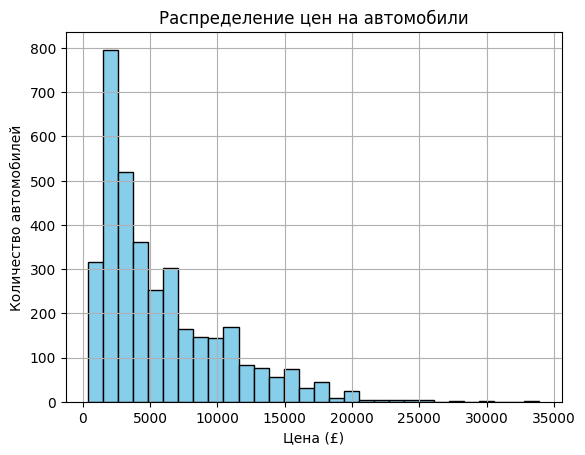

In [71]:
# 1. Гистограмма цен
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение цен на автомобили')
plt.xlabel('Цена (£)')
plt.ylabel('Количество автомобилей')
plt.grid(True)
plt.show()

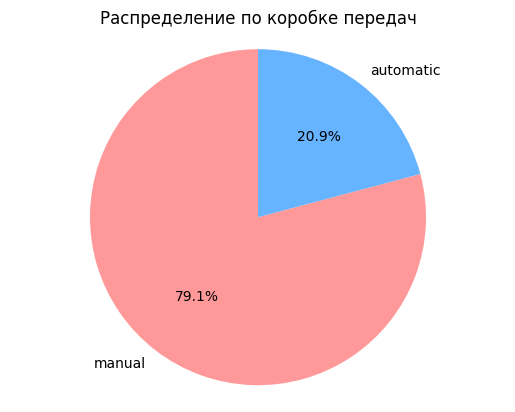

In [72]:
# 2. Круговая диаграмма по коробке передач
gear_counts = df['gearbox'].value_counts()
plt.pie(gear_counts, labels=gear_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Распределение по коробке передач')
plt.axis('equal')
plt.show()

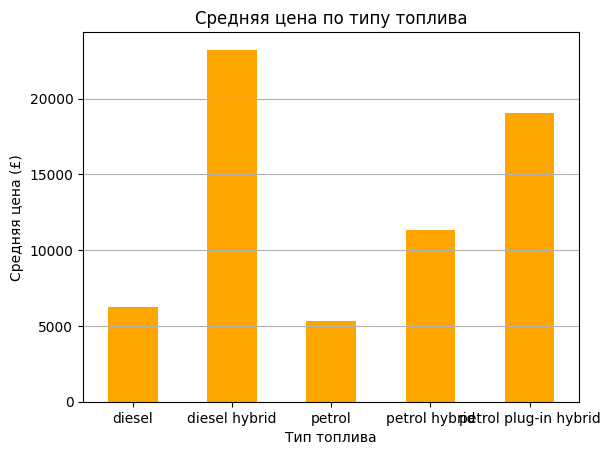

In [73]:
# 3. Средняя цена по топливу
fuel_price = df.groupby('fuel_type')['price'].mean()
fuel_price.plot(kind='bar', color='orange')
plt.title('Средняя цена по типу топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Средняя цена (£)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Text(0.5, 1.0, 'Цена автомобилей по году регистрации')

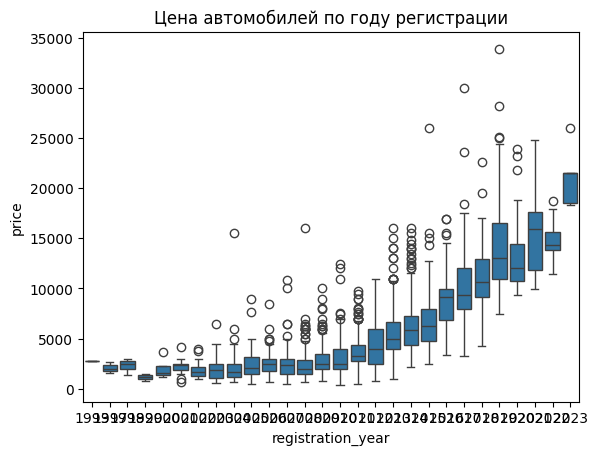

In [74]:
# 4. Цена по году регистрации
sns.boxplot(x='registration_year', y='price', data=df).set_title('Цена автомобилей по году регистрации')

/tmp/ipython-input-75-986153717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='previous_owners', data=df, palette='pastel').set_title('Количество автомобилей по числу владельцев')


Text(0.5, 1.0, 'Количество автомобилей по числу владельцев')

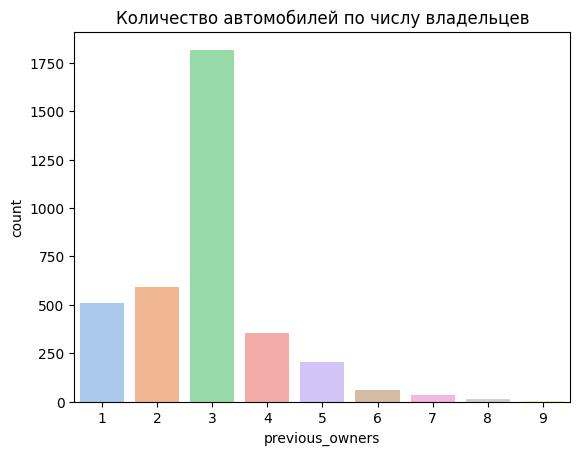

In [75]:
# 5. Seaborn: Boxplot цены по году регистрации
sns.countplot(x='previous_owners', data=df, palette='pastel').set_title('Количество автомобилей по числу владельцев')

### Выводы по графикам

*   Цены распределены неравномерно: большинство автомобилей находятся в диапазоне от 3,000 до 10,000 фунтов, есть выбросы выше 18,000.
*   Коробка передач: доминирует механика, но автомат занимает около 25% выборки.
*   Тип топлива: дизельные авто имеют самую высокую среднюю цену, бензин — более массовый, дешевле.
*   Год регистрации: наблюдается чёткая зависимость — чем новее автомобиль, тем выше его стоимость.
*   Количество владельцев: большинство машин имеют 2–3 владельца.

### «Портрет» типичного покупателя

Типичный покупатель подержанного автомобиля в Великобритании выбирает бензиновый или дизельный автомобиль стоимостью 4,000–9,000 фунтов, возрастом от 5 до 10 лет, с 3 владельцами и пробегом от 60,000 до 100,000 миль.
Чаще всего это 5-дверный хэтчбек с механической коробкой передач.
Покупатели ищут баланс между ценой, надёжностью и эксплуатационными расходами.

# Выводы и рекомендации

## Итоги аналитической работы

* Проведена полная предобработка данных: устранены пропуски, приведены типы, удалены дубликаты, стандартизированы названия.
* Выполнен исследовательский анализ: проведена фильтрация, логическая и координатная индексация, сводные таблицы, группировки и агрегации.
* Построено 5 графиков для визуализации ключевых закономерностей (цена, пробег, владельцы, коробка, топливо).
* Выявлены факторы, которые сильнее всего влияют на цену автомобиля.

## Ответ на бизнес-задачу

### Бизнес-задача

Определить, какие характеристики повышают или понижают стоимость подержанных автомобилей, чтобы рекомендовать продавцам, как формировать цену, а покупателям — как выбирать авто.

### Результат
Задача решена. Анализ показал, что на стоимость больше всего влияют:

* год выпуска (+)
* пробег (–)
* количество владельцев (–)
* объём двигателя (+)
* тип коробки и топлива (+)
  Также подтверждено: марка влияет на цену даже при одинаковых характеристиках (BMW, Mercedes-Benz — дороже Ford, Peugeot и т.п.).

###  Личные открытия

Познакомился с вторичным рынком Великобритании и увеличил знания в сфере автомбильных марок.

## Практические рекомендации

### Для продавцов

* Делать акцент на одного владельца, низкий пробег и наличие полной сервисной истории — усиливает доверие покупателя и позволяет обосновать высокую цену.
* Указывать параметры чётко и корректно. Особенно: год, объём двигателя, тип коробки. Они критически важны для покупателей.

### Для покупателей

* Если важна экономия — рассматривать авто с 2–3 владельцами, до 2014 года выпуска и пробегом до 100 000 миль — это оптимально по цене и состоянию.
* Машины с автоматом и дизелем стоят дороже, но выгодны при частых поездках — стоит учитывать цели эксплуатации.

## Возможности дальнейшей работы

* Обучение модели ML для предсказания цены по характеристикам (регрессия).
* Расширение датасета за счёт новых регионов, чтобы сравнить рынок Великобритании с другими странами ЕС.